<a href="https://colab.research.google.com/github/girotodenis/ReconhecimentoImagemVisaoComputacional/blob/master/Atividade2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

NOME COMPLETO DOS INTEGRANTES DO GRUPO:
**Davi Miranda Gonçalves**, 
**Denis SIlva Giroto**,
**Naiara Moura Pires**

MATRÍCULAS DOS INTEGRANTES DO GRUPO:
**1931143030**,
**1931143029**,
**1931143033**


In [2]:
# Clone the entire repo.
!git clone -l -s https://github.com/girotodenis/ReconhecimentoImagemVisaoComputacional.git cloned-repo

Cloning into 'cloned-repo'...
remote: Enumerating objects: 106, done.
remote: Counting objects: 100% (106/106), done.
remote: Compressing objects: 100% (102/102), done.
remote: Total 106 (delta 49), reused 20 (delta 2), pack-reused 0
Receiving objects: 100% (106/106), 17.76 MiB | 6.85 MiB/s, done.
Resolving deltas: 100% (49/49), done.


In [3]:
%cd cloned-repo
!ls

/content/cloned-repo
Atividade1.ipynb  Atividade2.ipynb  imagens  README.md


In [14]:
from google.colab.patches import cv2_imshow
%matplotlib inline
from matplotlib import pyplot as plt
import cv2
import os
import numpy as np

In [5]:
execution_path = os.getcwd()
print(execution_path)

/content/cloned-repo


#Atividade 1



##Exercício 1

Escreva um programa em que o limiar seja estimado
automaticamente usando a técnica de Global Thresholding. A saída
deve ser uma imagem binarizada e a entrada de ser a imagem
fingerPrint.png. Qual a relação que existe entre o limiar e o número
de iterações?

In [93]:
def estimar_limiar_otsu(imagem):
  hist = cv2.calcHist([imagem],[0],None,[256],[0,256])
  hist_norm = hist.ravel()/hist.max()

  plt.hist(hist_norm, bins=256)
  plt.show()

  Q = hist_norm.cumsum()
  bins = np.arange(256)
  fn_min = np.inf
  limiar = -1
  for i in range(1,256):
      p1,p2 = np.hsplit(hist_norm,[i]) 
      q1,q2 = Q[i],Q[255]-Q[i] 
      b1,b2 = np.hsplit(bins,[i])
      m1,m2 = np.sum(p1*b1)/q1, np.sum(p2*b2)/q2
      v1,v2 = np.sum(((b1-m1)**2)*p1)/q1,np.sum(((b2-m2)**2)*p2)/q2
      fn = v1*q1 + v2*q2
      if fn < fn_min:
          fn_min = fn
          limiar = i
  return limiar

def global_thresholding(imagem):
  limiar = estimar_limiar_otsu(imagem)
  print('limiar',limiar)
  limiar, imgLimiar = cv2.threshold(imagem, limiar, 256,cv2.THRESH_BINARY)
  print('limiar',limiar)
  return imgLimiar




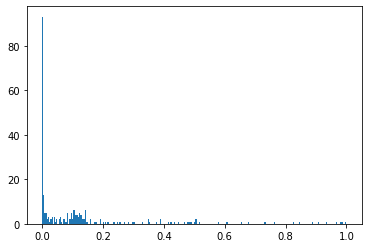

limiar 126
limiar 126.0


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in double_scalars
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: RuntimeWarning: divide by zero encountered in double_scalars
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in multiply


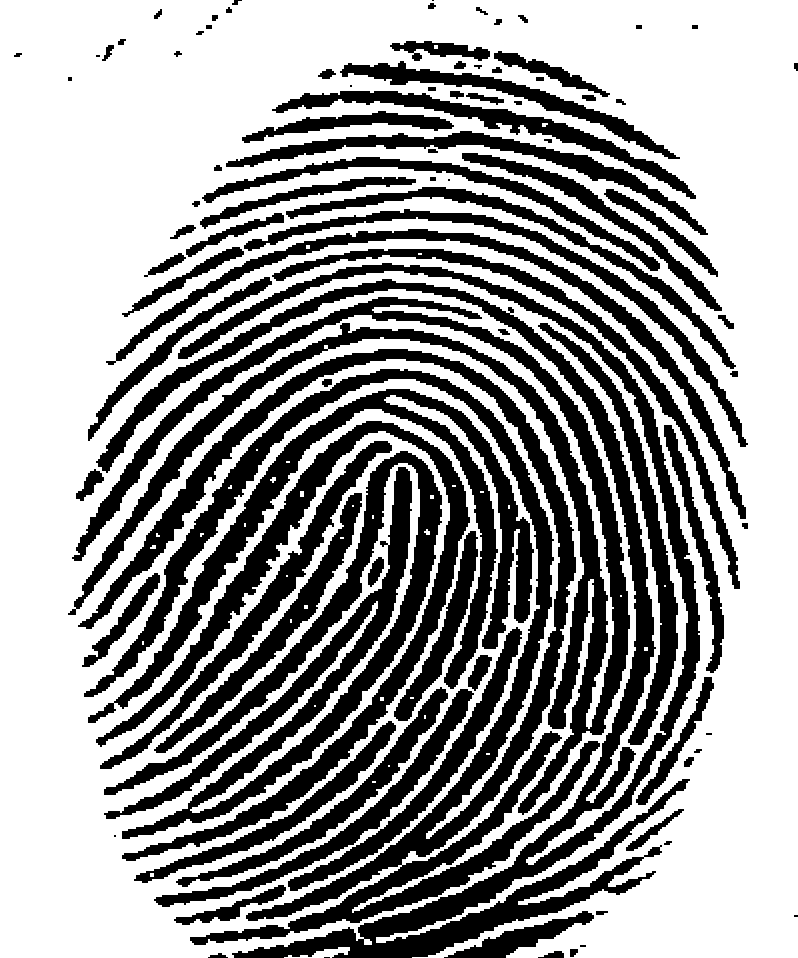

In [94]:
imagem = cv2.imread('./imagens/fingerPrint.png',0) 
#imagem = cv2.GaussianBlur(imagem, (5, 5), 0) 
imgLimiar = global_thresholding( imagem ) 
cv2_imshow( imgLimiar )

####R. 
Quanto mais interações mais o EM(Expectation-Maximization) vai convergir. Melhora a precisão de encontrar o melhor linear.

##Exercício 2
A imagem abaixo possui círculos e quadrados de vários tamanhos.
Alguns objetos possuem um ou dois buracos dentro deles. Faça um
algoritmo que use operações morfológicas e lógicas para responder
as perguntas abaixo.

###a)

Que fração dos pixels da imagem são brancos? Quantos objetos a
imagem possui?

####R.


###b)

Quantos buracos há na imagem? Quantos objetos têm mais de um
buraco?

####R.


###c)

Quantos quadrados e círculos a imagem possui?

####R.  

###d)
Identifique os quadrados que possuem buracos e os círculos que
não possuem buracos?

####R.